# Import Libraries

In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load Clean Dataset

In [7]:
train = pd.read_csv('../data/clean_train.csv')
test = pd.read_csv('../data/clean_test.csv')

In [8]:
print(list(train.columns))
print(train.info())
print(train.ExterCond.value_counts())
print(list(train.columns))
print(train.info())
print(train.ExterCond.value_counts())

['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'Alley', 'LotShape', 'Utilities', 'LandSlope', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'PoolQC', 'Fence', 'MiscFeature', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice', 'MSZoning_FV', 'MSZoning_RH', 'MSZoning_RL', 'MSZoning_RM', 'Street_Pave', 'LandContour_HLS', 'LandContour_Low', 'LandContour_Lvl'

# Create New Features

In [9]:
train['lot_frontage_lot_area'] = train['LotFrontage'] * train['LotArea']
test['lot_frontage_lot_area'] = test['LotFrontage'] * test['LotArea']

train["TotalSF"] = train["1stFlrSF"] + train["2ndFlrSF"] + train["TotalBsmtSF"]
test["TotalSF"] = test["1stFlrSF"] + test["2ndFlrSF"] + test["TotalBsmtSF"]

train["TotalBath"] = (
        train["FullBath"] + 0.5*train["HalfBath"] +
        train["BsmtFullBath"] + 0.5*train["BsmtHalfBath"]
    )
test["TotalBath"] = (
        test["FullBath"] + 0.5*test["HalfBath"] +
        test["BsmtFullBath"] + 0.5*test["BsmtHalfBath"]
    )

train["HouseAge"] = train["YrSold"] - train["YearBuilt"]    
test["HouseAge"] = test["YrSold"] - test["YearBuilt"]

train["RemodAge"] = train["YrSold"] - train["YearRemodAdd"]
test["RemodAge"] = test["YrSold"] - test["YearRemodAdd"]

train["IsRemodeled"] = (train["YearRemodAdd"] != train["YearBuilt"]).astype(int)
test["IsRemodeled"] = (test["YearRemodAdd"] != test["YearBuilt"]).astype(int)

train["GarageAge"] = train["YrSold"] - train["GarageYrBlt"]
test["GarageAge"] = test["YrSold"] - test["GarageYrBlt"]

train["Qual_LivArea_Interaction"] = train["OverallQual"] * train["GrLivArea"]
test["Qual_LivArea_Interaction"] = test["OverallQual"] * test["GrLivArea"]

# Add binary features
train["has_MasVnrArea"] = (train["MasVnrArea"] > 0).astype(int)
train["has_Bsmt"] = (train["BsmtFinSF1"] > 0).astype(int)
train["has_2ndFlr"] = (train["2ndFlrSF"] > 0).astype(int)
train["has_Garage"] = (train["GarageArea"] > 0).astype(int)
train["has_Pool"] = (train["PoolArea"] > 0).astype(int)

test["has_MasVnrArea"] = (test["MasVnrArea"] > 0).astype(int)
test["has_Bsmt"] = (test["BsmtFinSF1"] > 0).astype(int)
test["has_2ndFlr"] = (test["2ndFlrSF"] > 0).astype(int)
test["has_Garage"] = (test["GarageArea"] > 0).astype(int)
test["has_Pool"] = (test["PoolArea"] > 0).astype(int)

# New Remodeled Age Feature

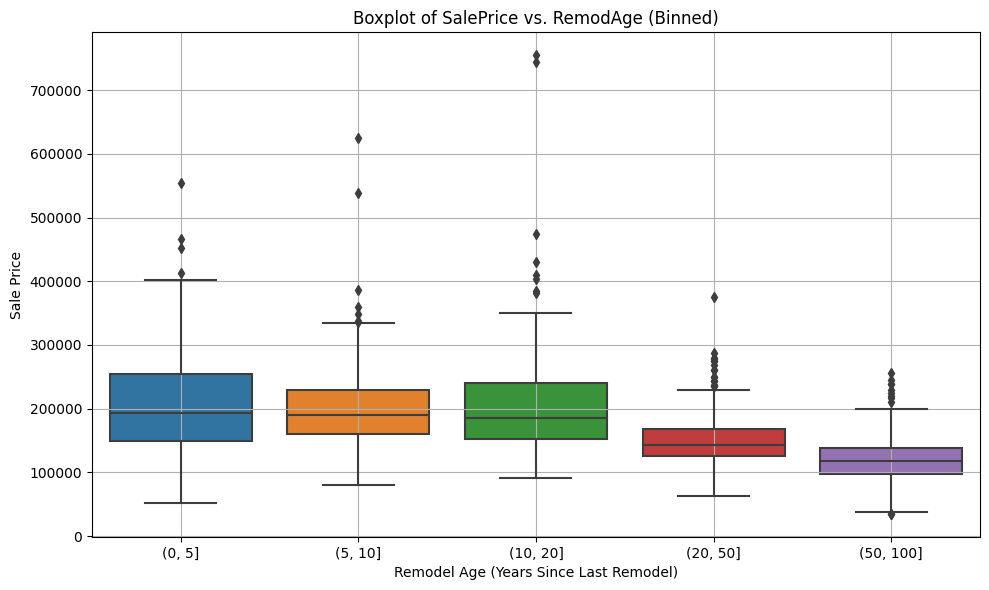

In [10]:
# Plot
plt.figure(figsize=(10, 6))
sns.boxplot(x=pd.cut(train['RemodAge'], bins=[0, 5, 10, 20, 50, 100]), y=train['SalePrice'])
plt.title("Boxplot of SalePrice vs. RemodAge (Binned)")
plt.xlabel("Remodel Age (Years Since Last Remodel)")
plt.ylabel("Sale Price")
plt.xticks(rotation=0)
plt.grid(True)
plt.tight_layout()
plt.show()

# Save New Train and Test Datasets

In [11]:
train.to_csv('../data/new_train.csv', index=False)
print("New train dataset saved as new_train.csv.")
test.to_csv('../data/new_test.csv', index=False)
print("New test dataset saved as new_test.csv.")

New train dataset saved as new_train.csv.
New test dataset saved as new_test.csv.
